In [10]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import pandas_profiling
import math

In [12]:
taxi_trips_2018 = pd.read_csv("../input/2018-new-years-eve-nyc-taxi-trips/2018_Yellow_Taxi_Trip_Data (1).csv")
taxi_trips_2019 = pd.read_csv("../input/2018-new-years-eve-nyc-taxi-trips/2019_Yellow_Taxi_Trip_Data (3).csv")
taxi_trips_2019 = taxi_trips_2019.drop(['congestion_surcharge'], axis=1)
data = pd.concat([taxi_trips_2018, taxi_trips_2019], axis=0, ignore_index=True)
data

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0              2  12/31/2018 04:25:56 PM  12/31/2018 04:28:26 PM   
1              2  12/31/2018 04:46:47 PM  12/31/2018 05:13:47 PM   
2              2  12/31/2018 11:38:51 PM  01/01/2019 01:15:20 AM   
3              2  12/31/2018 06:01:36 AM  12/31/2018 06:09:18 AM   
4              2  12/31/2018 06:00:10 AM  12/31/2018 06:25:37 AM   
...          ...                     ...                     ...   
252172         1  01/01/2019 04:46:21 AM  01/01/2019 06:05:05 AM   
252173         2  01/01/2019 03:40:59 AM  01/01/2019 06:08:39 AM   
252174         1  01/01/2019 05:17:43 AM  01/01/2019 06:18:30 AM   
252175         4  01/01/2019 05:03:53 AM  01/01/2019 06:29:57 AM   
252176         1  01/01/2019 04:17:02 AM  01/01/2019 06:33:31 AM   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     1           0.44           1                  N   
1                     1           4.09           1                  N   
2                     1           0.00           5                  N   
3                     1           3.10           1                  N   
4                     2          17.57           2                  N   
...                 ...            ...         ...                ...   
252172                1          43.20           4                  N   
252173                1          18.57           2                  N   
252174                2          14.30           1                  N   
252175                1          31.62           1                  N   
252176                1         119.80           1                  N   

        PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0                164           234             1          4.0    0.5      0.5   
1                261           189             1         19.5    0.5      0.5   
2                230            13             1         59.0    0.0      0.0   
3                132            10             2         11.0    0.5      0.5   
4                132             4             1         52.0    0.0      0.5   
...              ...           ...           ...          ...    ...      ...   
252172           161           265             1        197.5    0.5      0.5   
252173           132           263             1         52.0    0.0      0.5   
252174           100            37             1         51.5    0.5      0.5   
252175            80            74             2         93.0    0.5      0.5   
252176           163           265             1        306.5    0.5      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  
0             0.00          0.00                    0.3          5.30  
1             5.20          0.00                    0.3         26.00  
2             6.00          0.00                    0.0         65.00  
3             0.00          0.00                    0.3         12.30  
4            10.56          0.00                    0.3         63.36  
...            ...           ...                    ...           ...  
252172        0.00          0.00                    0.3        198.80  
252173       10.00          5.76                    0.3         68.56  
252174        0.00          0.00                    0.3         52.80  
252175        0.00          0.00                    0.3         94.30  
252176        0.00         22.50                    0.3        330.30  

[252177 rows x 17 columns]

In [13]:

drop_list = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'tolls_amount', 'total_amount']
data = data.drop(drop_list, axis=1)
data

tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0       12/31/2018 04:25:56 PM  12/31/2018 04:28:26 PM                1   
1       12/31/2018 04:46:47 PM  12/31/2018 05:13:47 PM                1   
2       12/31/2018 11:38:51 PM  01/01/2019 01:15:20 AM                1   
3       12/31/2018 06:01:36 AM  12/31/2018 06:09:18 AM                1   
4       12/31/2018 06:00:10 AM  12/31/2018 06:25:37 AM                2   
...                        ...                     ...              ...   
252172  01/01/2019 04:46:21 AM  01/01/2019 06:05:05 AM                1   
252173  01/01/2019 03:40:59 AM  01/01/2019 06:08:39 AM                1   
252174  01/01/2019 05:17:43 AM  01/01/2019 06:18:30 AM                2   
252175  01/01/2019 05:03:53 AM  01/01/2019 06:29:57 AM                1   
252176  01/01/2019 04:17:02 AM  01/01/2019 06:33:31 AM                1   

        trip_distance  PULocationID  DOLocationID  payment_type  fare_amount  \
0                0.44           164           234             1          4.0   
1                4.09           261           189             1         19.5   
2                0.00           230            13             1         59.0   
3                3.10           132            10             2         11.0   
4               17.57           132             4             1         52.0   
...               ...           ...           ...           ...          ...   
252172          43.20           161           265             1        197.5   
252173          18.57           132           263             1         52.0   
252174          14.30           100            37             1         51.5   
252175          31.62            80            74             2         93.0   
252176         119.80           163           265             1        306.5   

        extra  mta_tax  tip_amount  improvement_surcharge  
0         0.5      0.5        0.00                    0.3  
1         0.5      0.5        5.20                    0.3  
2         0.0      0.0        6.00                    0.0  
3         0.5      0.5        0.00                    0.3  
4         0.0      0.5       10.56                    0.3  
...       ...      ...         ...                    ...  
252172    0.5      0.5        0.00                    0.3  
252173    0.0      0.5       10.00                    0.3  
252174    0.5      0.5        0.00                    0.3  
252175    0.5      0.5        0.00                    0.3  
252176    0.5      0.5        0.00                    0.3  

[252177 rows x 12 columns]

In [14]:
def time_difference(time1, time2):
    pu = datetime.datetime.strptime(time1.strip(), "%m/%d/%Y %H:%M:%S")
    do = datetime.datetime.strptime(time2.strip(), "%m/%d/%Y %H:%M:%S")
    diff = do-pu
    return float(diff.seconds/60) 
    

def convert(time): 
    if time[-2:] == "AM" and time[:2] == "12": 
        return "00" + time[2:-2] 
    elif time[-2:] == "AM": 
        return time[:-2] 
    elif time[-2:] == "PM" and time[:2] == "12": 
        return time[:-2] 
    else: 
        return str(int(time[:2]) + 12) + time[2:8]


def process_datetime(data):
    data['totalTime'] = float(0)
    
    for index, df in data.iterrows():
        string_pu = df.tpep_pickup_datetime
        data.at[index, 'tpep_pickup_datetime'] = string_pu.replace(string_pu[-11:], convert(string_pu[-11:])).strip()
        
        string_do = df.tpep_dropoff_datetime
        data.at[index, 'tpep_dropoff_datetime'] = string_do.replace(string_do[-11:], convert(string_do[-11:])).strip()
    
    for index, df in data.iterrows():
        data.at[index, 'totalTime'] = round(time_difference(df.tpep_pickup_datetime, df.tpep_dropoff_datetime))
    
    return data

def add_totalCharge(data):
    data['totalCharge'] = float(0)
    
    for index, df in data.iterrows():
        data.at[index, 'totalCharge'] = float(df.fare_amount + df.extra + df.mta_tax + df.improvement_surcharge)
    
    return data


def add_time(data):
    data['pickup_time'] = int(0)
    data['dropoff_time'] = int(0)
    
    for index, df in data.iterrows():
        pickup_time = df.tpep_pickup_datetime[-8:-6]
#         pickup_time = datetime.datetime.strptime(pickup_time.strip(), "%H:%M:%S")
        data.at[index, 'pickup_time'] = int(pickup_time)
        
        dropoff_time = df.tpep_dropoff_datetime[-8:-6]
#         dropoff_time = datetime.datetime.strptime(dropoff_time.strip(), "%H:%M:%S")
        data.at[index, 'dropoff_time'] = int(dropoff_time)
    
    return data

# def add_tripTime_bin(data):
#     data['tripTime_bin'] = int(0)
    
#     for index, df in data.iterrows():
#         if int(df.tpep_pickup_datetime[-8:-6]) != int(df.tpep_dropoff_datetime[-8:-6]):
#             add_pu = int(df.tpep_pickup_datetime[-8:-6]) + 1
#             if add_pu < 10:
#                 str_add = '0' + str(add_pu) + ':00:00'
#             elif add_pu >= 24:
#                 str_add = '00:00:00'
#             else:
#                 str_add = str(add_pu) + ':00:00'
#             string_pu = df.tpep_pickup_datetime.replace(df.tpep_pickup_datetime[-8:], str_add)
#             pu_time = time_difference(df.tpep_pickup_datetime, string_pu)
            
#             string_do = df.tpep_pickup_datetime.replace(df.tpep_dropoff_datetime[-5:], '00:00')
#             do_time = time_difference(string_do, df.tpep_dropoff_datetime)
            
#             if pu_time >= do_time:
#                 data.at[index, 'tripTime_bin'] = int(df.tpep_pickup_datetime[-8:-6])
#             else:
#                 data.at[index, 'tripTime_bin'] = int(df.tpep_dropoff_datetime[-8:-6])
#         else:
#             data.at[index, 'tripTime_bin'] = int(df.tpep_pickup_datetime[-8:-6])
    
#     return data

In [15]:
data = process_datetime(data)
data = add_totalCharge(data)
data = add_time(data)
data

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       12/31/2018 16:25:56   12/31/2018 16:28:26                1   
1       12/31/2018 16:46:47   12/31/2018 17:13:47                1   
2       12/31/2018 23:38:51   01/01/2019 01:15:20                1   
3       12/31/2018 06:01:36   12/31/2018 06:09:18                1   
4       12/31/2018 06:00:10   12/31/2018 06:25:37                2   
...                     ...                   ...              ...   
252172  01/01/2019 04:46:21   01/01/2019 06:05:05                1   
252173  01/01/2019 03:40:59   01/01/2019 06:08:39                1   
252174  01/01/2019 05:17:43   01/01/2019 06:18:30                2   
252175  01/01/2019 05:03:53   01/01/2019 06:29:57                1   
252176  01/01/2019 04:17:02   01/01/2019 06:33:31                1   

        trip_distance  PULocationID  DOLocationID  payment_type  fare_amount  \
0                0.44           164           234             1          4.0   
1                4.09           261           189             1         19.5   
2                0.00           230            13             1         59.0   
3                3.10           132            10             2         11.0   
4               17.57           132             4             1         52.0   
...               ...           ...           ...           ...          ...   
252172          43.20           161           265             1        197.5   
252173          18.57           132           263             1         52.0   
252174          14.30           100            37             1         51.5   
252175          31.62            80            74             2         93.0   
252176         119.80           163           265             1        306.5   

        extra  mta_tax  tip_amount  improvement_surcharge  totalTime  \
0         0.5      0.5        0.00                    0.3        2.0   
1         0.5      0.5        5.20                    0.3       27.0   
2         0.0      0.0        6.00                    0.0       96.0   
3         0.5      0.5        0.00                    0.3        8.0   
4         0.0      0.5       10.56                    0.3       25.0   
...       ...      ...         ...                    ...        ...   
252172    0.5      0.5        0.00                    0.3       79.0   
252173    0.0      0.5       10.00                    0.3      148.0   
252174    0.5      0.5        0.00                    0.3       61.0   
252175    0.5      0.5        0.00                    0.3       86.0   
252176    0.5      0.5        0.00                    0.3      136.0   

        totalCharge  pickup_time  dropoff_time  
0               5.3           16            16  
1              20.8           16            17  
2              59.0           23             1  
3              12.3            6             6  
4              52.8            6             6  
...             ...          ...           ...  
252172        198.8            4             6  
252173         52.8            3             6  
252174         52.8            5             6  
252175         94.3            5             6  
252176        307.8            4             6  

[252177 rows x 16 columns]

In [16]:
profile = data.profile_report(title='Pandas Profiling Report', correlation_overrides=['pickup_time'], n_extreme_obs=10)
profile.to_file(output_file="output.html")

In [17]:
profile

In [18]:
data.to_csv('data.csv', index=False)

In [ ]:
# test = data.tpep_pickup_datetime[2]
# add_pu = int(test[-8:-6]) + 1
# if add_pu < 10:
#     str_add = '0' + str(add_pu) + ':00:00'
# elif add_pu >= 24:
#     str_add = '00:00:00'
# else:
#     str_add = str(add_pu) + ':00:00'
# string_pu = test.replace(test[-8:], str_add)
# pu_time = time_difference(test, string_pu)
# print(pu_time)

# test1 = data.tpep_dropoff_datetime[2]
# string_do = test1.replace(test1[-5:], '00:00')
# do_time = time_difference(string_do, test1)
# print(do_time)

# if pu_time >= do_time:
#     print('pu_time is greater than do_time')
# else:
#     print('do_time is greater than pu_time')
#     print(int(test1[-8:-6]))

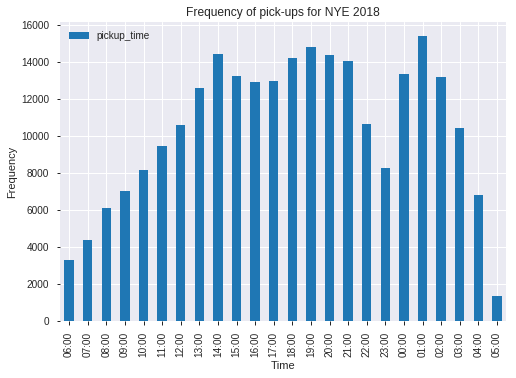

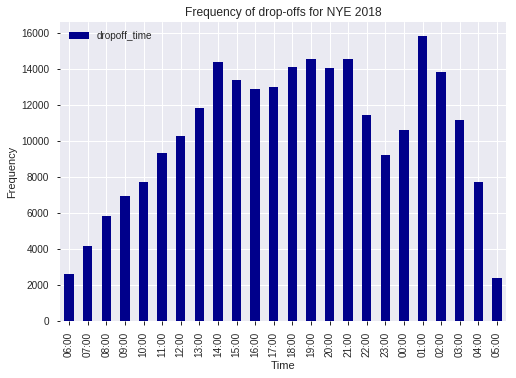

In [19]:
def barplot_pickup_dropoff(data):
    label = ['06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', 
             '19:00', '20:00', '21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00']
    pu_time = [data['pickup_time'].value_counts().to_frame()['pickup_time'][int(x[0:2])] for x in label]
    do_time = [data['dropoff_time'].value_counts().to_frame()['dropoff_time'][int(x[0:2])] for x in label]

    df = pd.DataFrame({'Time':label, 'pickup_time':pu_time, 'dropoff_time':do_time})
    az = df.plot.bar(x='Time', y='pickup_time', title= 'Frequency of pick-ups for NYE 2018').set_ylabel('Frequency')
    ax = df.plot.bar(x='Time', y='dropoff_time', color='darkblue', title = 'Frequency of drop-offs for NYE 2018').set_ylabel('Frequency')

    fig1 = az.get_figure()
    fig1.savefig("frequency_of_pickups_for_NYE_2018.png", bbox_inches = "tight")

    fig2 = ax.get_figure()
    fig2.savefig("frequency_of_dropoffs_for_NYE_2018.png", bbox_inches = "tight")
    az
    ax

barplot_pickup_dropoff(data)

In [ ]:
def plot(data):
    label = ['06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', 
             '19:00', '20:00', '21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00']
    avg_totalTime = []
    avg_tip = []
    avg_totalCharge = []
    avg_distance = []

    for x in label:
        total_time = 0
        total_tip = 0
        total_charge = 0
        total_dist = 0
        count = 0
        for index, df in data.iterrows():
            if int(x[0:2]) == df.pickup_time:
                total_time += df.totalTime
                total_tip += df.tip_amount
                total_charge += df.totalCharge
                total_dist += df.trip_distance
                count += 1

        avg_totalTime.append(total_time/count)
        avg_tip.append(total_tip/count)
        avg_totalCharge.append(total_charge/count)
        avg_distance.append(total_dist/count)

    dg = pd.DataFrame({'Time':label, 'Ave. trip duration':avg_totalTime, 'Ave. tip':avg_tip, 'Ave. charge':avg_totalCharge, 'Ave. distance':avg_distance})
    ac = dg.plot(x='Time', y='Ave. trip duration', title = 'Average Trip Duration per Hour').set_ylabel('Duration (Min)')
    av = dg.plot(x='Time', y='Ave. tip', title = 'Average tip per Hour').set_ylabel('Tip (USD)')
    ab = dg.plot(x='Time', y='Ave. charge', title = 'Average charge per Hour').set_ylabel('Charge (USD)')
    an = dg.plot(x='Time', y='Ave. distance', title = 'Average trip distance per hour').set_ylabel('Distance (Mi)')

    fig3 = ac.get_figure()
    fig3.savefig("average_trip_duration_per_hour", bbox_inches='tight')
    ac
    fig4 = av.get_figure()
    fig4.savefig("average_tip_per_hour", bbox_inches='tight')
    av
    fig5 = ab.get_figure()
    fig5.savefig("average_charge_per_hour", bbox_inches='tight')
    ab
    fig6 = an.get_figure()
    fig6.savefig("average_trip_distanc_per_hour", bbox_inches='tight')
    an

plot(data)

In [ ]:
%matplotlib inline
gt = data.groupby(['pickup_time', 'passenger_count'])['pickup_time'].count().unstack('passenger_count')

def barplot_stacked(df, percentage=False):
    labels = ('06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', 
             '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00')

    colors = ['blue', 'purple', 'pink', 'orange', 'red', 'gold', 'teal']

    pass_index = [0, 1, 2, 3, 4, 5, 6, 8]
    time_index = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5]
    passenger = []

    for i in pass_index:
        pass_count = []
        for j in time_index:
            value = gt[i][j]*i
            if math.isnan(value):
                value = 0
            pass_count.append(value)

        passenger.append(pass_count)

    r = np.arange(24).tolist()
    raw_data = {'1 passenger' : passenger[1], '2 passengers' : passenger[2],
                '3 passengers' : passenger[3], '4 passengers' : passenger[4], '5 passengers' : passenger[5],
                '6 passengers' : passenger[6], '8 passengers': passenger[7]}
    df = pd.DataFrame(raw_data, index=labels)

    if percentage:
        for i in df.index:
            df.loc[i]=df.loc[i]*100/sum(df.loc[i])

    btm=df.iloc[:,0]-df.iloc[:,0]

    for i,j in zip(df,colors):
        plt.bar(r,df[i],bottom=btm,color=j,label=i, width=0.6)
        btm=btm+df[i]

    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.xticks(r, labels, rotation=90)
    plt.xlabel('Time')
    if percentage:
        plt.title('Passenger Composition per Hour')
        plt.ylabel('Percentage')
        plt.savefig("passenger_count_per_hour_percentage", bbox_inches='tight')
    else:
        plt.title('Passenger Count per Hour')
        plt.ylabel('Passenger Count')
        plt.savefig("passenger_count_per_hour", bbox_inches='tight')
    plt.show()

    
barplot_stacked(gt)
barplot_stacked(gt, percentage=True)

In [ ]:
def pie_payment(data):
    gh = data['payment_type'].value_counts().tolist()
    pie_values = gh[0:2]
    pie_values.append(gh[2]+gh[3])
    label = ['credit card', 'cash', 'others']
    colors = ['darkgreen', 'yellowgreen', 'lightgreen']
    explode = (0.1, 0, 0)

    plt.pie(pie_values, explode=explode, labels=label, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.title("Payment methods for taxi trips in New Year's Eve 2018")
    plt.savefig("payment_type_piechart", bbox_inches='tight')
    # plt.axis('equal')
    plt.show()

pie_payment(data)

In [ ]:
map_df = gpd.read_file("../input/shapefile/taxi_zones.shp")

def heatmap(map_df, locationID):
    df = data[locationID].value_counts().to_frame()[locationID].reset_index()
    df = df.rename(columns={'index':'Location_ID', locationID:'Frequency'})

    merged = map_df.set_index('LocationID').join(df.set_index('Location_ID'))
    merged['Frequency'] = [0 if math.isnan(x) else x for x in merged['Frequency']]
    vmin, vmax = min(merged['Frequency']), max(merged['Frequency'])

    variable = 'Frequency'

    vmin, vmax = min(merged['Frequency']), max(merged['Frequency'])

    fig, ax = plt.subplots(1, figsize=(10, 6))
    img = merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')
    if locationID == 'PULocationID':
        ax.set_title("Taxi pickup frequencies/hr for New Year's Eve 2018", fontsize=18, fontweight=3)
    else:
        ax.set_title("Taxi dropoff frequencies/hr for New Year's Eve 2018", fontsize=18, fontweight=3)
    ax.axis('off')

    sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    chart = img.get_figure()
    if locationID == 'PULocationID':
        chart.savefig('pickup_heatmap.png', bbox_inches='tight')
    else:
        chart.savefig('dropoff_heatmap.png', bbox_inches='tight')

heatmap(map_df, 'PULocationID')
heatmap(map_df, 'DOLocationID')